## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

#### Functions
Bellow are the functions used frequently in the solution

In [1]:
def p_new(df):    
    """
    Calculates the probability of conversion in the treatment group of the dataframe.
    Parameters: 
        df: a DataFrame that is a subset of ab_data.csv
    """
    #Mask for obtaining individuals that converted
    mask_converted = df['converted']==1
    #Mask to obtain individuals in the treatment group
    mask_treatment_group = df['group']=='treatment'
    
    #Number of individuals in the treatment group
    num_indiv_treatment = df[mask_treatment_group].user_id.count()
    #Number of individuals in the treatment group that have converted
    num_indiv_treatment_converted = df[mask_treatment_group & mask_converted].user_id.count()
    #Probability of conversion in the treatment group (new page)
    p_new = num_indiv_treatment_converted/num_indiv_treatment
    
    return p_new

def p_old(df):
    """
    Calculates the probability of conversion in the control group of the dataframe.
    Parameters: 
        df: a DataFrame that is a subset of ab_data.csv
    """
    #Mask for obtaining individuals that converted
    mask_converted = df['converted']==1
    
    #Mask to obtain individuals in the control group
    mask_control_group = df['group']=='control'
    #Number of individuals in the control group
    num_indiv_control = df[mask_control_group].user_id.count()
    #Number of individuals in the control group that have converted
    num_indiv_control_converted = df[mask_control_group & mask_converted].user_id.count()
    #Probability of conversion in the control group (old page)
    p_old = num_indiv_control_converted/num_indiv_control   
    
    return p_old

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
#Read ab_data.csv file
df = pd.read_csv('ab_data.csv')
#Display first 5 elements of the df
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
#Collect the number of rows in the df
print("Number of rows: {} \n".format(df.shape[0]))
print(df.info())

Number of rows: 294478 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None


c. The number of unique users in the dataset.

In [5]:
print("Number of unique users: {}".format(df.user_id.nunique()))

Number of unique users: 290584


d. The proportion of users converted.

In [6]:
prop_converted = df.query('converted == 1').user_id.nunique()/df.user_id.nunique()
print("Proportion of users converted: {}".format(prop_converted))

Proportion of users converted: 0.12104245244060237


e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
#Create a mask for the individuals that are in the treatment group
mask_treatment = df['group'] == 'treatment'
#Create a mask for individuals with new_page not being the landing_page
mask_not_new_page = df['landing_page'] != 'new_page'
#Collect the number of individuals that are in the treatment group but
#with a landing_page different than new_page
num1 = df[mask_treatment  & mask_not_new_page].shape[0]

#Create a mask for the individuals that are not in the treatment group
mask_not_treatment = df['group'] != 'treatment'
#Create a mask for the individuals with new_page being the landing_page
mask_new_page = df['landing_page'] == 'new_page'
#Collect the number of individuals that are not in the treatment group but
#with new_page being the landing_page
num2 = df[mask_not_treatment & mask_new_page].shape[0]

#Sum both numbers to obtain all the cases in which new_page 
#and treatment do not line up
print("Number of times new_page and treatment don't line up: {}".format(num1 + num2))

Number of times new_page and treatment don't line up: 3893


f. Do any of the rows have missing values?

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
#The dataframe we want satisfies the opposite condition described in letter e.
df2 = df[~((mask_treatment & mask_not_new_page) | (mask_not_treatment & mask_new_page))]

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
print("Number of unique users df2: {}".format(df2.user_id.nunique()))

Number of unique users df2: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB
None


In [13]:
df2.user_id.value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
801490    1
799443    1
787157    1
793302    1
817882    1
842446    1
815835    1
805596    1
803549    1
809694    1
807647    1
895712    1
840399    1
836301    1
899810    1
834242    1
936604    1
934557    1
940702    1
938655    1
830144    1
828097    1
832195    1
838348    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

Indeed, used_id 773192 is repeated!

c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2 = df2.drop_duplicates(subset=['user_id','group','landing_page','converted'],keep='first')

In [16]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
prob_converting = df2[df2['converted']==1].user_id.count()/df2.user_id.count()
print("Probability of converting regardless the page = {}".format(prob_converting))

Probability of converting regardless the page = 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
#Probability that converted given control group
obs_p_old = p_old(df2)
print("probability converted | control group = {}".format(obs_p_old))

probability converted | control group = 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
obs_p_new = p_new(df2)
print("probability converted | treatment group = {}".format(obs_p_new))

probability converted | treatment group = 0.11880806551510564


d. What is the probability that an individual received the new page?

In [20]:
#Total number of individuals
num_indiv = df2.user_id.nunique()

#Number of inidividuals that received the new page (treatment group)
num_indiv_new_page = df2[df2['landing_page']=='new_page'].user_id.count()

#Probability of receiving new page
print("receiving new page = {}".format(num_indiv_new_page/num_indiv))

receiving new page = 0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Looking at the conditional probabilities P(converted|new_page) = 0.1188 and P(converted|old_page) = 0.1204, one could think that there is pratically no change in the proportion of users that converted using the old or the new page. Actually, the observed result suggest that the new page reduced the proportion of users who decide to pay for the company's product. However, inference statistics must be used to support this conclusion. **

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$$H_{0}: \pi_{new} - \pi_{old} \leq 0$$**
**$$H_{1}: \pi_{new} - \pi_{old} \gt 0$$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

We are assuming that $p_{new}$ and $p_{old}$ are equal to the converted rate in the df2 regardless on the page.

In [21]:
#Probability of pnew under the null
p_new_h0 = df2[df2['converted']==1].user_id.count()/df2.user_id.count()
print(p_new_h0)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
#Probability of pold under the null
p_old_h0 = df2[df2['converted']==1].user_id.count()/df2.user_id.count()
print(p_old_h0)

0.11959708724499628


c. What is $n_{new}$?

In [23]:
n_new = df2[df2['group']=='treatment'].user_id.count()
print(n_new)

145310


d. What is $n_{old}$?

In [24]:
n_old = df2[df2['group']=='control'].user_id.count()
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
#We can simulate a binomial distribution - solution obtained through discussion in the Slack group
new_converted_simulation = np.random.binomial(n_new, p_new_h0, 10000)/n_new

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
#We can simulate a binomial distribution - solution obtained through discussion in the Slack group
old_converted_simulation = np.random.binomial(n_old, p_old_h0, 10000)/n_old

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
p_diffs_binomial = new_converted_simulation - old_converted_simulation
print(p_diffs_binomial.mean())

1.3045985475573197e-05


The observed $p_{new} - p_{old}$ is:

In [28]:
obs_p_diffs = obs_p_new - obs_p_old

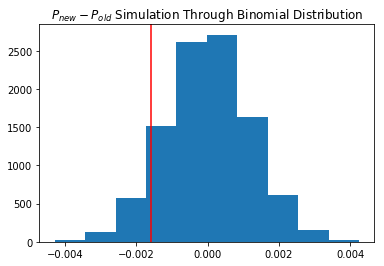

In [29]:
ax = plt.hist(p_diffs_binomial);
plt.title("$P_{new} - P_{old}$ Simulation Through Binomial Distribution");
# plot line for observed statistic
plt.axvline(x=obs_p_diffs,color='r');

#### Let's calculate the p_value for this simulation:

In [30]:
#p_value for pnew - pold through binomial distribution
(p_diffs_binomial > obs_p_diffs).mean()

0.9067

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [31]:
p_diffs = []
for _ in range(10000):
    #First, we create a bootstrap sample
    b_sample = df2.sample(df2.shape[0],replace = True)
    #Second, we calculate the proportion of conversion for the treatment group
    pnew = p_new(b_sample)
    #Third, we calculate the proportion of conversion for the control group
    pold = p_old(b_sample)
    #Finally, we compute the difference in proportions and append it to p_diffs
    p_diffs.append(pnew - pold)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

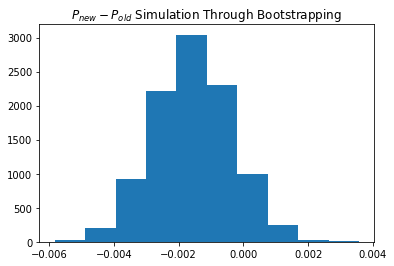

In [62]:
plt.hist(p_diffs);
plt.title("$P_{new} - P_{old}$ Simulation Through Bootstrapping");

As expected, the $P_{new} - P_{old}$ distribution has a bell shape!

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

To calculate the proportion of p_diffs that are greater than the actual difference observed in ab_data.csv, we need to assume the null hypothesis is true, that is: $\pi_{new}$ - $\pi_{old} = 0$. From the bootstrapping distribution, one can obtain the distribution variance, as follows:

In [33]:
np.array(p_diffs).std()

0.001213233754748633

Now, from the Central Limit Theorem, we can assume that we have a normal distribution, with 0 mean and `np.array(p_diffs).std()` standard deviation, as follows:

In [34]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, np.array(p_diffs).std(), np.array(p_diffs).size)

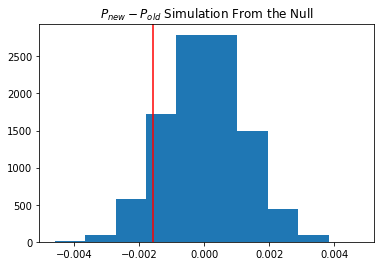

In [56]:
# plot null distribution
plt.hist(null_vals);
plt.title("$P_{new} - P_{old}$ Simulation From the Null");

# plot line for observed statistic
plt.axvline(x=obs_p_diffs,color='r');

In [36]:
(null_vals > obs_p_diffs).mean()

0.905

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**What I have just computed is what is called, in scientific studies, the p-value. Essentially, because of the Central Limit Theorem, one can say that the p_diffs distribution has a normal shape. Therefore, the proportion of the p_diffs that are greater than the actual difference observed in df2 is what contradicts the null hypothesis. Since this value is much higher than 0.05, it means that the observed difference in df2 is not as that contradictory and, therefore, one should not reject the null hypothesis. We would reject the null hypothesis if this p-value was lower than 0.05, which was the determined acceptable type I error. Notice that simulating the distribution from a binomial distribution and from a normal one resulted in very similar results (a p-value around 0.9).**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm
mask_converted = df['converted']==1
mask_old = df2['group']=='control'
mask_new = df2['group']=='treatment'

convert_old = df2[mask_converted & mask_old].user_id.count()
convert_new = df2[mask_converted & mask_new].user_id.count()
n_old = df2[mask_old].user_id.count()
n_new = df2[mask_new].user_id.count()

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [38]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old])

In [39]:
print(z_score)

-1.3109241984234394


In [40]:
from scipy.stats import norm

print(norm.cdf(z_score)) # Tells us how significant our z-score is
print(norm.ppf(1-(0.05/2))) # Tells us what our critical value at 95% confidence

0.09494168724097551
1.959963984540054


Notice that because $p_{new} < p_{old}$, the `sm.stats.proportions_ztest` performed a left tail test. Therefore, the p-value that corresponds to the ones calculated in parts j and k is `1-norm.cdf(z_score)`, which is also around 0.9!

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The results indeed agree with the findings in parts j and k. That is because the resulting z_score obtained was -1.31, while the the critical value for a 95% confidence interval is at 1.96. That means our observed value is definetly not in the critical region (-1.31 << 1.96) and one should not reject the null hypothesis. The p_value in this case was also much higher than 0.05, supporting the same conclusion. Besides, 1-0.09494168724097551, which is the p-value, is also around 0.9**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We could use a Logistic Regression in this case**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [41]:
df2['intercept']=1

In [42]:
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

In [43]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [44]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2019-01-11 10:38 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [46]:
np.exp(-0.0150)

0.9851119396030626

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value calculated here represents how much the model can be explained by the ab_page variable. Therefore, since this value is huge, we do not have statistical evidence that the treatment group explains the changes presented in the conversion rate. Besides, if we look at exponential of the ab_page coefficient, we can clearly see that this value is very close to 1, supporting the argument that the treatment group do not increses the number of conversion compared to the control group.**

**Moreover, it is possible to point out the differences between the hypothesis tests for the regression model and for the tests made in Part II. In Part II, the null and alternative hypothesis were:**

**$$H_{0}: p_{new} - p_{old} \leq 0$$**
**$$H_{1}: p_{new} - p_{old} \gt 0$$**

**For the regression model, the hypothesis tests can be formulated in the following manner:**

**$$H_{0}: \beta_{1} = 0$$**
**$$H_{1}: \beta_{1} \neq 0$$**

**Where $\beta_{1}$ is the real explanatory variable. That means we are now assuming as the null hypothesis that there is no regression at all, or, in other words, that the response variable cannot be explained by the regression model. Therefore, in this case, the hypothesis test has two tails (the alternative hypothesis assumption is the $\neq$) and, therefore, $\frac{(1 - \alpha)}{2}$ probability for each side tail.**


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**The advantage of using multiple linear regression is that we can see how multiple variables (quantitative or categorical) affects the prediction model. Adding more variables can improve the model, meaning it can batter explain the observed data. However, there are also disadvantages in using additional terms. For example, maybe the variables we add in the model are related to one another, which is known as multicollinearity. Moreover, maybe the relationship between those variables are better explained through higher order terms, leading to a model hard to interpret. Therefore, the idea is to include as much information as possible that increases the model's predictability and, at the same time, maintains its simplicity.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [47]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [48]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [49]:
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [50]:
### Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new = df_new.drop('US', axis=1)

In [51]:
df_new.head(1)

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1


In [52]:
log_mod = sm.Logit(df_new['converted'], df_new[['intercept','CA', 'UK']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2019-01-11 10:38 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

In [53]:
print("CA Coef.: {}".format(np.exp(-0.0408)))
print("UK Coef.: {}".format(np.exp(0.0099)))

CA Coef.: 0.9600211149716509
UK Coef.: 1.0099491671175422


**Looking at the p_value from both CA and UK, we do not have enought statistical evidence to support the hypothesis that country had an inpact on conversion. Moreover, even if we assumed that it does, both coefficients are very close to 1, which also suggest that conversion is not favored by one of the three countries.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [54]:
### Fit Your Linear Model And Obtain the Results
log_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','CA', 'UK']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2019-01-11 10:39 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

**Performing the Logistical Regression for both country and page, the conclusion is kept the same: the p-values do not provide enought statistical evidence to reject the hypothesis that the new web page do not improve the number of users who decide to pay for the company's product.**

#### EXTRA - Verifying the DataFrame time Range

In [55]:
# duration of this experiment
max = pd.to_datetime(df2.sort_values(by=['timestamp'])['timestamp'].tail(1)).iloc[0].to_period('W')
min = pd.to_datetime(df.sort_values(by=['timestamp'])['timestamp'].head(1)).iloc[0].to_period('W')
duration = (max-min)
print(duration)

3


<a id='conclusions'></a>
## Conclusions

In this project, the results of an A/B test run by an e-commerce website were analysed to help the company decided whether a new developed page is usefull increasing the number of users who decide to pay for the company's product. The following approaches were used to make the analyses:

- Two different DataFrames were used and marged: one containing informations about the users (if it belongs to the control group or to the treatment one and if it has converted or not), and another one containing information about the user location country.

- A hypothesis test was performed assuming as the null hypothesis that the new web page had worst or equal results compared to the old page in terms of converting users.

- The hypothesis tests were performed in two different ways: first, a bootstrapping approach was used. Then, a two-tail test was performed. Both tests aimed to compare the proportion of users that converted using the new and the old web page.

- To support the conclusions obtained from the hypothesis test, a Logistic Regression was performed for both the web page and for the country.

The hypothesis test performed with the proportions resulted in very large p-values, indicating that one do not have enought statistical evidence to reject the null hypothesis. Moreover, **the practical significance** of the data do not support, itself, the alternative hypothesis. If we indeed had enough statistical evidence to reject the null hypothesis, the observed difference in the conversion proportions would be around 0.0016, which definitively do not have any pratical meaning.

Finally, the Logistical Regression reinforced the conclusion that one should no assume that the new page improved the conversion rate. Neither the country, or the web page, or both, suggested a improvement in conversion.

The last conclusion I would like to point out is that all the tests made in this project gave enought evidence to assume that both pages have very simillar rate of conversion.

What I would suggest to my client:

- Maybe try to consider a different metric for the experiment, such as the revenue.
- Try to reduce novelty effect and change aversion doing a larger experiment or trying to isolate older users. Notice that the experiment was done over only 3 weeks.